# Investigate some indicators in differen countries

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [66]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='intro'></a>
## Introduction

From the given data set options I chose 6 datasets from the [Gapminder World](https://www.google.com/url?q=http://www.gapminder.org/data/&sa=D&ust=1532469042121000):

* Children per woman total fertility
* Child mortality 0-5 years olds dying per 1000 born
* CO_2 emissions in tonnes per person
* Income per person inflation adjusted
* Life expectancy years
* Murger per 100000 people

To easy the further process the dataframes named and are stored in a dictionary.

In [67]:
# Read CSV Files, name them and store them in a dictionary
files = {'fertility' : 'children_per_woman_total_fertility.csv',
        'child_mortality': 'child_mortality_0_5_year_olds_dying_per_1000_born.csv',
        'income' : 'income_per_person_gdppercapita_ppp_inflation_adjusted.csv',
      #  'c02_emissions': 'co2_emissions_tonnes_per_person.csv',
        'life_expectancy': 'life_expectancy_years.csv'}#,
      #  'murders' : 'murder_per_100000_people.csv'}
dfs = {}
for key, value in files.items():
    dfs[key] = pd.read_csv(value, index_col=0).T
    dfs[key].rename_axis('year', inplace=True)
    # Transpose, so that columns are countries and the index is years.


<a id='wrangling'></a>
## Data Wrangling

The CSV files provide the given data for each country (row) and many years (columns). To unifiy the given data I already transposed the csv files, so that the countries appear in the columns and the years in  the index.

### Shapes of the DataFrames

First step I investigate the shapes of the frames, which will most likely not be the same and try to unify them later.

In [68]:
for key, df in dfs.items():
    print('Shape of ' + key + ' is ' + str(df.shape))

Shape of fertility is (301, 184)
Shape of child_mortality is (301, 195)
Shape of income is (241, 193)
Shape of life_expectancy is (301, 187)


Code above shows, that initial thought was right. Therefore it is testet, which columns are common in all Frames.
#### Columns

In [69]:
dataframe_list = list(files.keys())
common_columns = set(dfs[dataframe_list.pop()].columns)

for key in dataframe_list:
    common_columns = sorted(set.intersection(set(common_columns),
                                             set(dfs[key].columns)))
print(common_columns)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jorda

The list ist still quite long, so from these the following countries are chosen:

* Germany (my home country)
* Poland (my ancestors country, and a former soviet union country now in the EU)
* Ukraine (a former soviet union country not in the EU)
* Russia (former soviet union)
* Switzerland (managed to convince the whole world to bring them teir money)
* United States

In [70]:
common_columns = ['Germany', 'Poland', 'Ukraine', 'Russia', 'Switzerland', 'United States']
dfs_common_columns = {}
for key, df in dfs.items():
    dfs_common_columns[key] = df[common_columns]

### Data Cleaning 
#### Column Names

The column names are replaced with small caps and `_` for spaces:

In [71]:
dfs_common_columns[key] 

country,Germany,Poland,Ukraine,Russia,Switzerland,United States
year,,,,,,
1800,38.4,35.9,36.6,29.6,38.0,39.4
1801,38.4,35.9,36.6,29.6,38.0,39.4
1802,38.4,35.9,36.6,29.6,38.0,39.4
1803,38.4,35.9,36.6,29.6,38.0,39.4
1804,38.4,35.9,36.6,29.6,38.0,39.4
...,...,...,...,...,...,...
2096,90.2,88.2,81.1,83.3,93.1,88.1
2097,90.3,88.3,81.3,83.4,93.3,88.2
2098,90.4,88.4,81.4,83.5,93.4,88.3


In [72]:
dfs_clean_headings = {}
for key, df in dfs_common_columns.items():
    df = df.rename(columns=lambda x : x.strip().lower().replace(" ", "_"))
    dfs_clean_headings[key] = df
    
dfs_clean_headings[key].head(1)# display only the last one

country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
1800,38.4,35.9,36.6,29.6,38.0,39.4


#### Types
Now checking for the types of data.

In [73]:
for key, df in dfs_clean_headings.items():
    print(key)
    df.info()

fertility
<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 1800 to 2100
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   germany        301 non-null    float64
 1   poland         301 non-null    float64
 2   ukraine        301 non-null    float64
 3   russia         301 non-null    float64
 4   switzerland    301 non-null    float64
 5   united_states  301 non-null    float64
dtypes: float64(6)
memory usage: 16.5+ KB
child_mortality
<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 1800 to 2100
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   germany        301 non-null    float64
 1   poland         301 non-null    float64
 2   ukraine        301 non-null    float64
 3   russia         301 non-null    float64
 4   switzerland    301 non-null    float64
 5   united_states  301 non-null    float64
dtypes: float64(6)
mem

All data seems ok. All values are floats, except for the income, whicch are integers. That is ok, now for the index:

In [74]:
for key, df in dfs_clean_headings.items():
    print('The type of the index of ' + key + ' is ' + str(type(df.index[0])))

The type of the index of fertility is <class 'str'>
The type of the index of child_mortality is <class 'str'>
The type of the index of income is <class 'str'>
The type of the index of life_expectancy is <class 'str'>


All indices of the frames are strings, they are set to integer now:

In [75]:
for key, _ in dfs_clean_headings.items():
    dfs_clean_headings[key].index = dfs_clean_headings[key].index.astype(int)
    print('The type of the index of ' + key + ' is ' + str(type(dfs_clean_headings[key].index[0])))
    

The type of the index of fertility is <class 'numpy.int64'>
The type of the index of child_mortality is <class 'numpy.int64'>
The type of the index of income is <class 'numpy.int64'>
The type of the index of life_expectancy is <class 'numpy.int64'>


#### Double rows
Now are there any duplicate rows? If so, drop them!

In [77]:
for key, df in dfs_clean_headings.items():
    num_duplicates = sum(df.duplicated())
    print('Duplicate rows in Frame ' + key + ': ' + str(num_duplicates))
    if num_duplicates > 0:
        df.drop_duplicates(inplace=True)
        num_duplicates = sum(df.duplicated())
        print('Duplicate rows in Frame ' + key + ': ' + str(num_duplicates))
        dfs_clean_headings[key] = df


Duplicate rows in Frame fertility: 20
Duplicate rows in Frame fertility: 0
Duplicate rows in Frame child_mortality: 34
Duplicate rows in Frame child_mortality: 0
Duplicate rows in Frame income: 0
Duplicate rows in Frame life_expectancy: 62
Duplicate rows in Frame life_expectancy: 0


Now, there are no duplicates in the frames.

#### Rows

Now since there where duplicate rows, lets do a cleaning for the common rows. 

In [78]:
dataframe_list = list(files.keys())
common_rows = set(dfs[dataframe_list.pop()].index)

for key in dataframe_list:
    common_rows = sorted(set.intersection(set(common_rows),
                                          set(dfs[key].index)))
print(common_rows)

['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813', '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821', '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829', '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837', '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845', '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924',

The common years in the data frames are from 1800 to 2040, which represents the last 220 years and a forecast. This seems to much, therefore the set is limited from 1900 until 2020. The index are strings will be cleaned later.

The next cell shortens the index and shows, that now all frames are equally sized.

In [80]:
dfs_common_rows_and_columns = {}
for key, _ in dfs_clean_headings.items():
    dfs_common_rows_and_columns[key] = dfs_clean_headings[key].loc['1900' : '2020']
    display(dfs_common_rows_and_columns[key].head(1))
    display(dfs_common_rows_and_columns[key].tail(1))
    print('Shape of ' + key + ' is ' + str(dfs_common_rows_and_columns[key].shape))



country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
1900,4.93,5.49,6.69,7.36,3.83,3.85


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
2020,1.49,1.29,1.59,1.77,1.56,1.89


Shape of fertility is (121, 6)


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
1900,372.0,317.0,360.0,409.0,197.0,232.0


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
2020,3.24,4.13,8.18,6.52,3.91,6.62


Shape of child_mortality is (121, 6)


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
1900,6030,3300,1650,3090,13800,6250


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
2020,46700,30900,8770,26200,59100,57500


Shape of income is (121, 6)


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
1900,43.9,40.5,36.4,30.8,47.5,49.0


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
2020,81.1,78.5,70.9,72.7,84.4,78.6


Shape of life_expectancy is (121, 6)


#### NaN Values
Are there any nan values in the frames?

In [81]:
for key, df in dfs_common_rows_and_columns.items():
    print('\n' + key)
    print('=' * len(key))
    print(np.sum(df.isna()))


fertility
country
germany          0
poland           0
ukraine          0
russia           0
switzerland      0
united_states    0
dtype: int64

child_mortality
country
germany          0
poland           0
ukraine          0
russia           0
switzerland      0
united_states    0
dtype: int64

income
country
germany          0
poland           0
ukraine          0
russia           0
switzerland      0
united_states    0
dtype: int64

life_expectancy
country
germany          0
poland           0
ukraine          0
russia           0
switzerland      0
united_states    0
dtype: int64


### Safe Frames

In [82]:
for key, df in dfs_common_rows_and_columns.items():
    df.to_csv(key + '.csv', index=True)

<a id='eda'></a>
## Exploratory Data Analysis
### Load Frames

In [83]:
final_df = {}
for name in files.keys():
    final_df[name] = pd.read_csv(name + '.csv', index_col=0)

## Overview over all generated Data
the next section shows some line plots over all data given in the data frames:

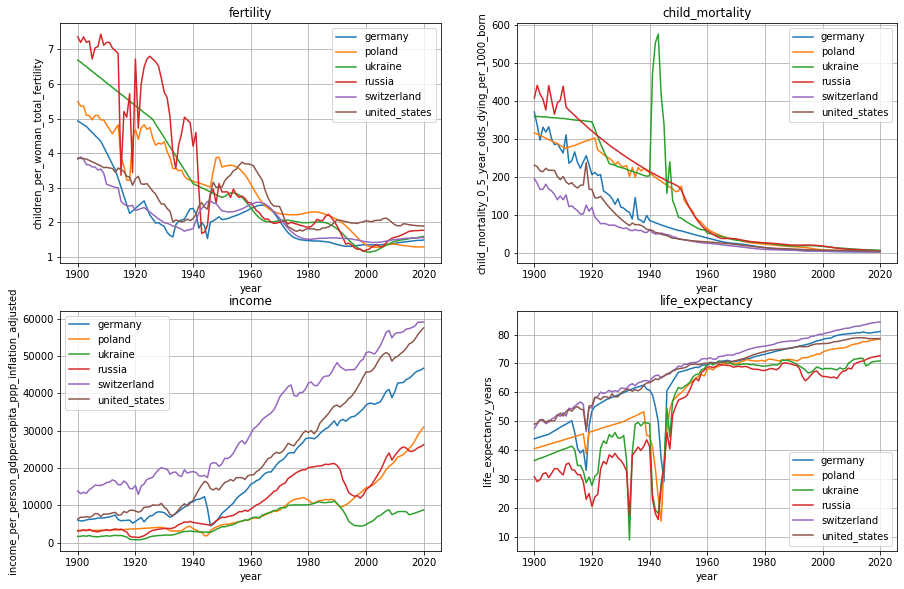

In [84]:
fig = plt.figure(figsize=(15,15))
for idx, (key, df) in enumerate(final_df.items()):
    ax = fig.add_subplot(3, 2, idx+1)
    df.plot(ax=ax)
    plt.grid(True)
    plt.ylabel(files[key].split('.')[0])
    plt.title(key)

Looking at the some conclusions can be drawn directly:

* The first (1914-1918) and second (1939-1945) World War had a severe impact on the fertility, child mortality and life expectancy.
* The most severe impact, even worse that World War II on life expectency in the soviet union was the so called [Holodomor](https://en.wikipedia.org/wiki/Holodomor) in 1932-1933
* The end of the soviet union decreased the income of the former soviet states to the level of the 1960s.
* The child moratlity data of Russia between 1915 and 1945 looks like someone extrapolated it. 



Additionally I investigate further questions:

* Is there a correlation between `income` and `life_expectancy`?
* Is there a correlation between `child_mortality` and `fertility`?
* Which Country had the biggest relative increas in `income`?
* How have `fertility` rates changed between 1900 and 2000?

### Is there a correlation between income and life expectancy?

### Is there a correlation between child_mortality and fertility?

### Which Country had the biggest relative increase in income between 1900 and 2000?

### How have `fertility` rates changed between 1900 and 2000?

<a id='conclusions'></a>
## Conclusions

* Is there a correlation between `income` and `life_expectancy`?
* Is there a correlation between `child_mortality` and `fertility`?
* Which Country had the biggest relative increas in `income`?
* How have `fertility` rates changed between 1900 and 2000?